# Model Evaluation

Below, the training and test data will be evaluated against different models. The evaluation will be accompanied with a **RMSE** (Root Mean Squared Error) checks to determine performance. This model evaluation focuses on predicting the hospitalization counts from the case, death counts, and popularity rate. This may be most significant to hospitals that are making decisions on human resource allocation and **PPE** (Personal Protective Equipment).

In [7]:
import pandas as pd
from sklearn.metrics import  root_mean_squared_error

# I know it is hitchhiker's guide to the galaxy
r_state = 42

models_train = []
models_test = []

In [8]:
train_df = pd.read_csv('data/train_data.csv', index_col='date_of_interest')
test_df = pd.read_csv('data/test_data.csv', index_col='date_of_interest')

columns = train_df.columns

print (columns)


Index(['CASE_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'popularity_rating',
       'norm_case_count_7day_avg', 'norm_death_count_7day_avg',
       'norm_popularity_rating', 'std_case_count_7day_avg',
       'std_death_count_7day_avg', 'std_popularity_rating', 'y'],
      dtype='object')


In [9]:
X_train = train_df[['std_log_case_count_7day_avg', 'std_log_death_count_7day_avg', 'std_log_popularity_rating']]
y_train = train_df['y'].apply( lambda x: 1.0 * x)

X_test = test_df[['std_log_case_count_7day_avg', 'std_log_death_count_7day_avg', 'std_log_popularity_rating']]
y_test = test_df['y'].apply( lambda x: 1.0 * x)

KeyError: "None of [Index(['std_log_case_count_7day_avg', 'std_log_death_count_7day_avg',\n       'std_log_popularity_rating'],\n      dtype='object')] are in the [columns]"

In [ ]:

y_train.info()

<class 'pandas.core.series.Series'>
Index: 238 entries, 03/01/2020 to 08/25/2024
Series name: y
Non-Null Count  Dtype  
--------------  -----  
238 non-null    float64
dtypes: float64(1)
memory usage: 3.7+ KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 09/01/2024 to 10/12/2025
Series name: y
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0+ bytes


In [ ]:
X_train.head()

,std_log_case_count_7day_avg,std_log_death_count_7day_avg,std_log_popularity_rating
date_of_interest,,,
03/01/2020,-5.419471,-1.897450,-2.242610
03/08/2020,-3.859638,-1.897450,-0.069064
03/15/2020,-0.577629,-1.337076,0.560743
03/22/2020,0.978378,0.929297,0.897515
03/29/2020,1.288279,2.455639,1.300604


In [ ]:
X_train.describe()

,std_log_case_count_7day_avg,std_log_death_count_7day_avg,std_log_popularity_rating
count,2.380000e+02,2.380000e+02,2.380000e+02
mean,3.582568e-16,3.582568e-16,-9.702789e-16
std,1.002107e+00,1.002107e+00,1.002107e+00
min,-5.419471e+00,-1.897450e+00,-2.242610e+00
25%,-7.006534e-01,-5.963018e-01,-7.157684e-01
50%,2.342328e-02,-7.851706e-02,-1.514319e-02
75%,6.782675e-01,4.720506e-01,8.035216e-01
max,3.054348e+00,3.482092e+00,1.927158e+00


In [ ]:
test_ticks = X_test.index
train_ticks = X_train.sort_index

In [ ]:
import matplotlib.pyplot as plt

def plot_line(y1, y2, ticks = test_ticks):
    working_data = {
        'actual' : y1,
        'predicted': y2
    }

    working_df = pd.DataFrame(working_data, index=ticks)
    ax = working_df.plot(kind="line", xlabel="Week Starting", ylabel="Average Count", figsize=(18,7))
    ax.set_xticks(range(len(working_df)))
    ax.set_xticklabels(working_df.index, rotation=45, ha='right')
    ax.grid(True, linestyle='dotted')


In [ ]:
def gen_model_entry(name, y1, y2):
    entry = {
        'model' : name,
        'rmse' : root_mean_squared_error(y1, y2)
    }    

    return entry

## Bsaeline

In [ ]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
dum_model = reg.fit(X_train, y_train)

y_pred = dum_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

111.96676045543444


In [ ]:
models_test.append(gen_model_entry('Dummy Regressor', y_test, y_pred))

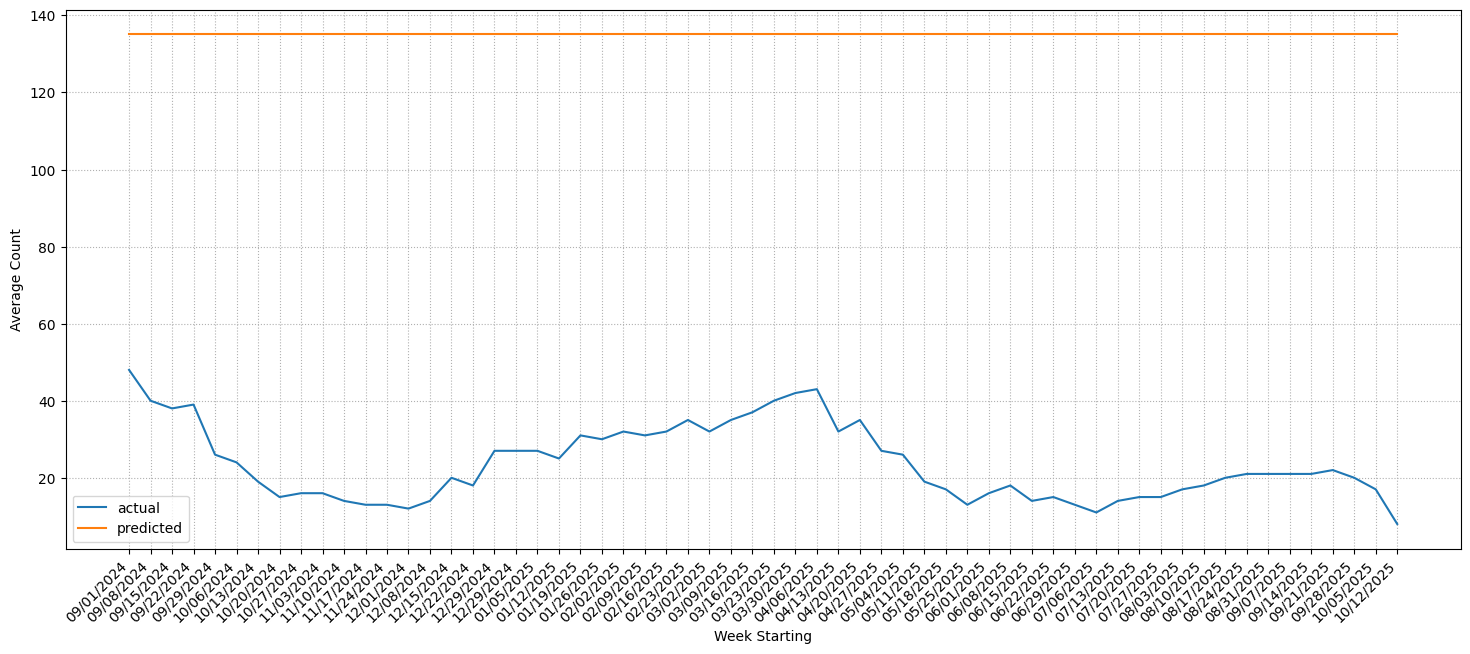

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = dum_model.predict(X_train)
models_train.append(gen_model_entry('Dummy Regressor', y_train.to_list(), y_pred))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=r_state, max_iter=1000)
log_model = reg.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

/home/mmcdougall/covid19-web-data-predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)


In [ ]:
report = root_mean_squared_error(y_test, y_pred )
print (report)

82.72313259703519


In [ ]:
models_test.append(gen_model_entry('Logistic Regressor', y_test, y_pred))

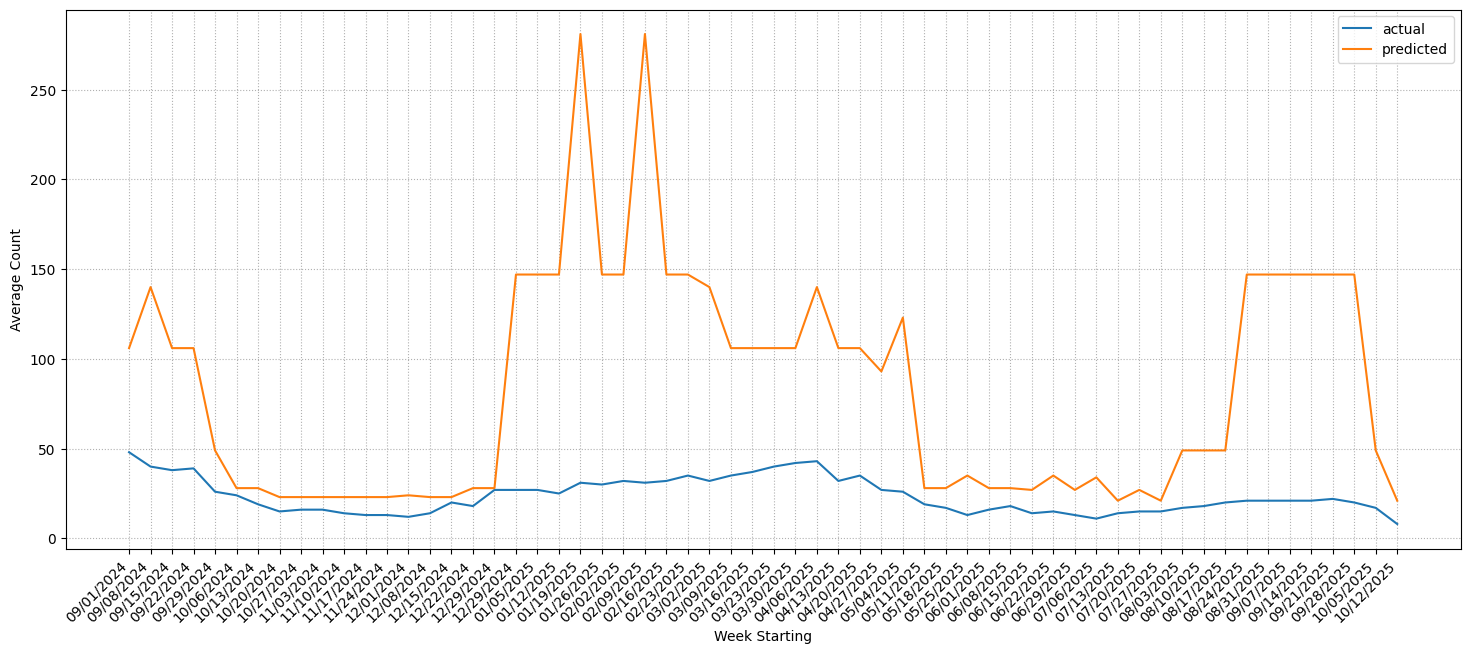

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = log_model.predict(X_train)
models_train.append(gen_model_entry('Logistic Regressor', y_train.to_list(), y_pred))

## Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linear_model = reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print (report)

185.8367097529705


In [ ]:
models_test.append(gen_model_entry('Linear Regressor', y_test, y_pred))

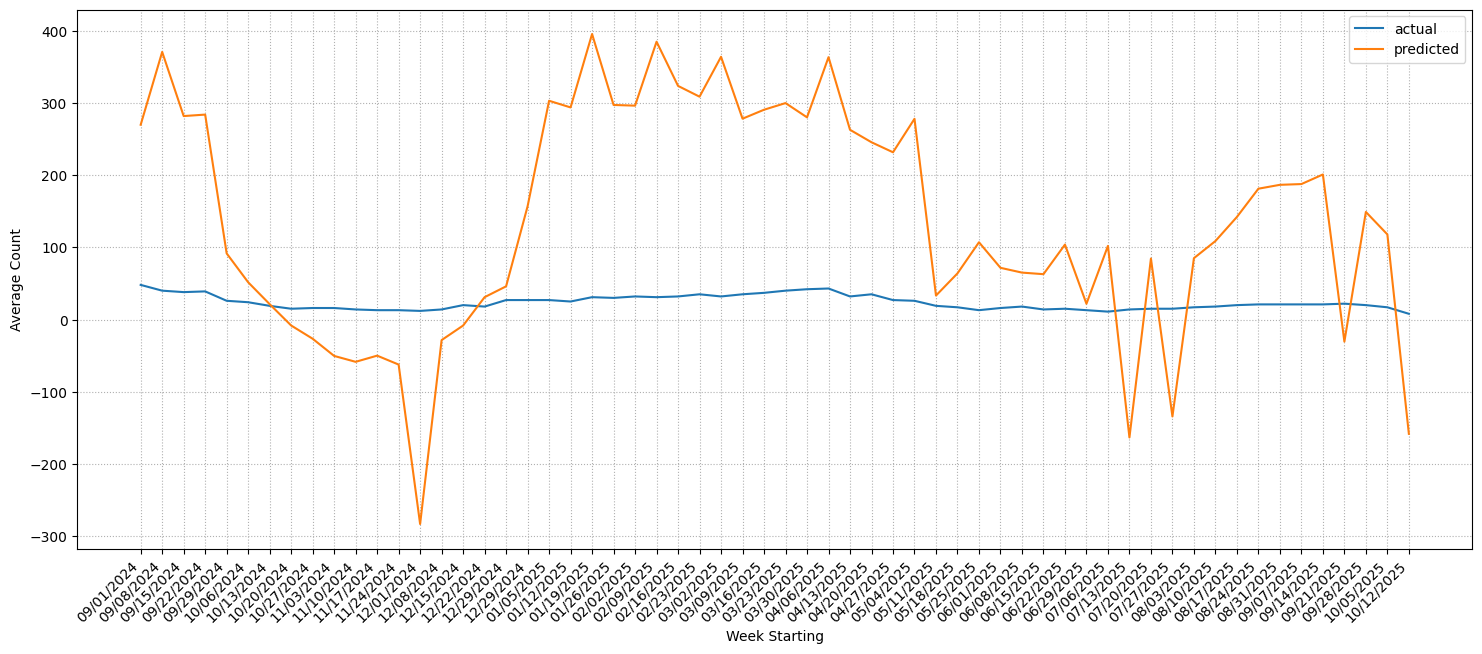

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = linear_model.predict(X_train)
models_train.append(gen_model_entry('Linear Regressor', y_train.to_list(), y_pred))

## Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
dtree_model = reg.fit(X_train, y_train)

y_pred = dtree_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

160.67389333678324


In [ ]:
models_test.append(gen_model_entry('Tree Regressor', y_test, y_pred))

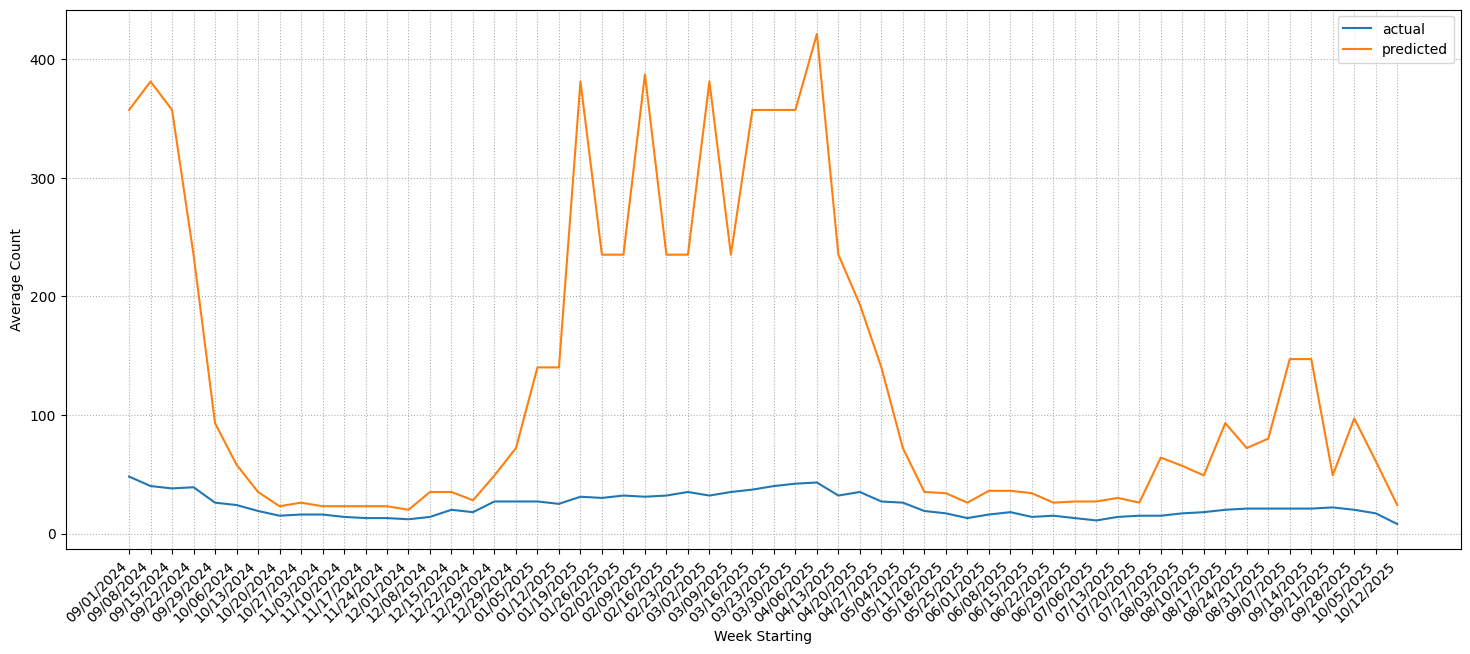

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = dtree_model.predict(X_train)
models_train.append(gen_model_entry('Tree Regressor', y_train.to_list(), y_pred))

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
rfg_model = reg.fit(X_train, y_train)

y_pred = rfg_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

178.47873191690562


In [ ]:
models_test.append(gen_model_entry('Random Forest Regressor', y_test, y_pred))

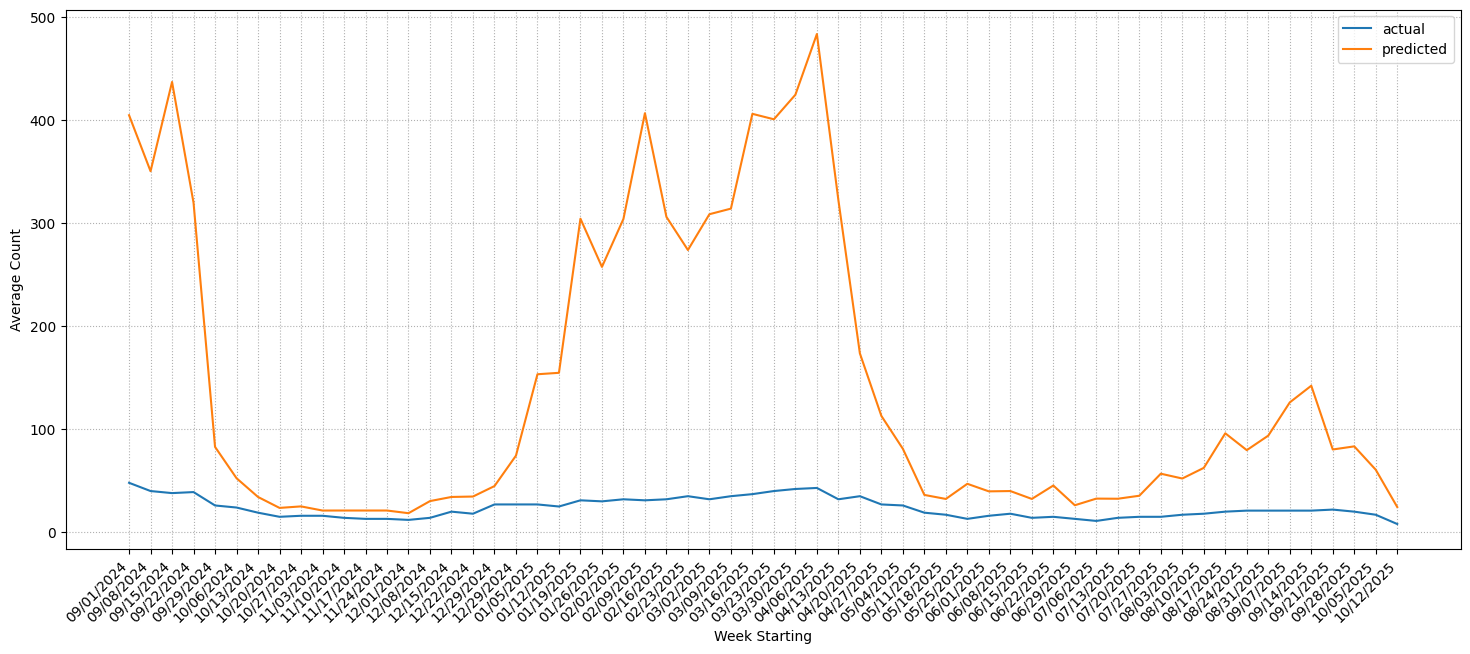

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = rfg_model.predict(X_train)
models_train.append(gen_model_entry('Random Forest Regressor', y_train.to_list(), y_pred))

## Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
gbr_model = reg.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

151.45262394260848


In [ ]:
models_test.append(gen_model_entry('Gradient Boost Regressor', y_test, y_pred))

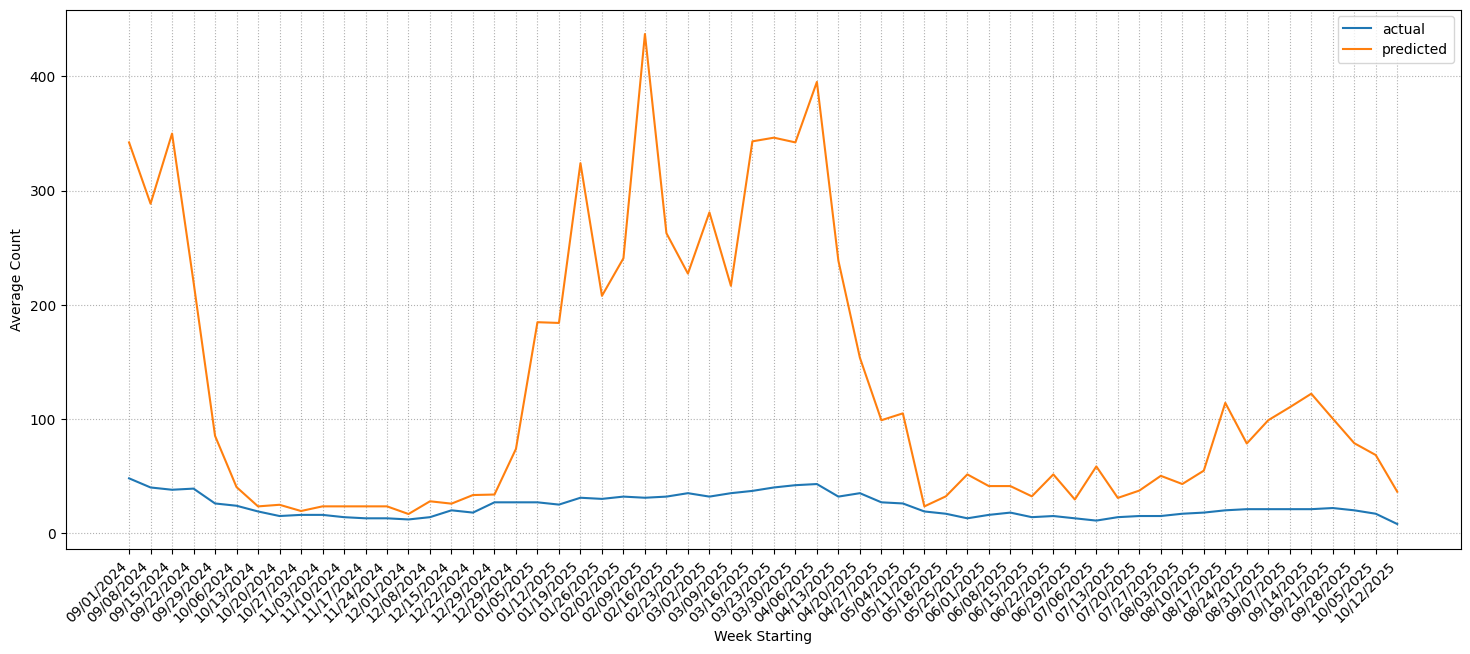

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = gbr_model.predict(X_train)
models_train.append(gen_model_entry('Gradient Boost Regressor', y_train.to_list(), y_pred))

## XGBoost Regressor

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=r_state)
xgb_model = reg.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

158.76749267181464


In [ ]:
models_test.append(gen_model_entry('XGBoost Regressor', y_test, y_pred))

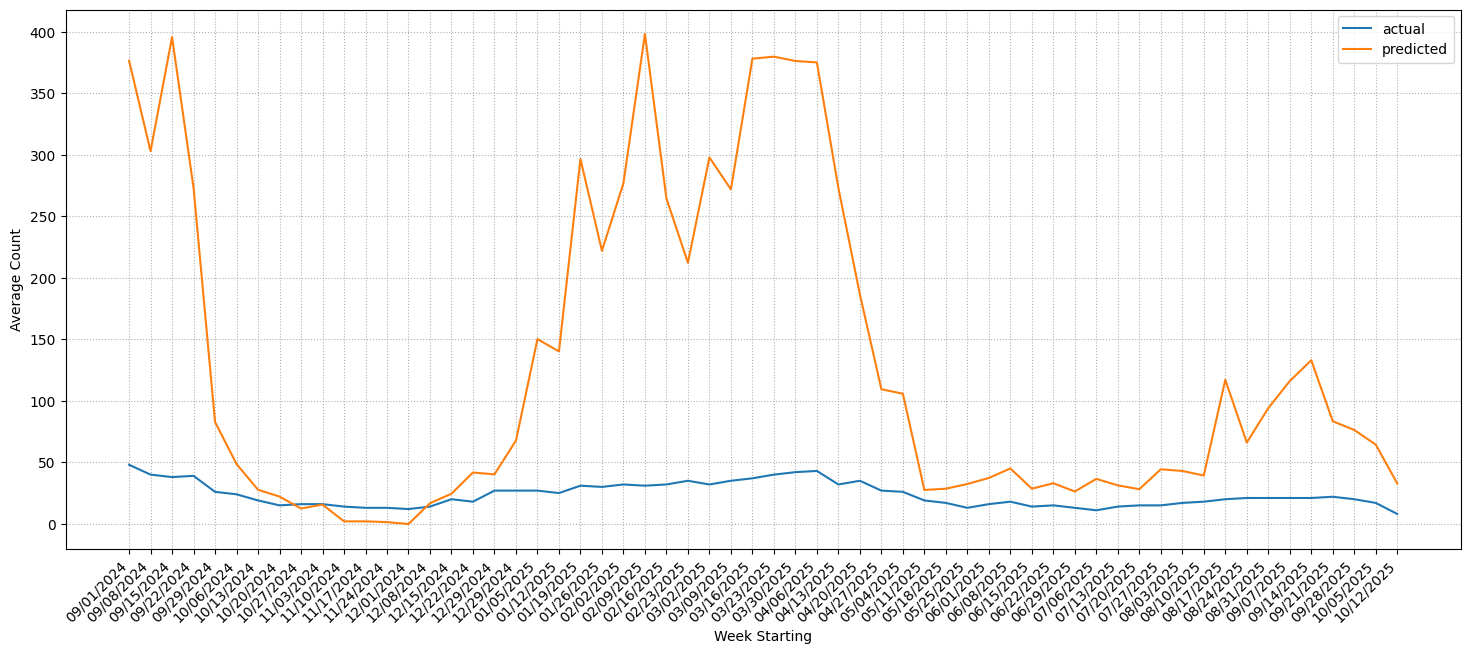

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = xgb_model.predict(X_train)
models_train.append(gen_model_entry('XGBoost Regressor', y_train.to_list(), y_pred))

## Bayes Regressor

In [ ]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
br_model = reg.fit(X_train, y_train)

y_pred = br_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

184.7090116277155


In [ ]:
models_test.append(gen_model_entry('Bayes Regressor', y_test, y_pred))

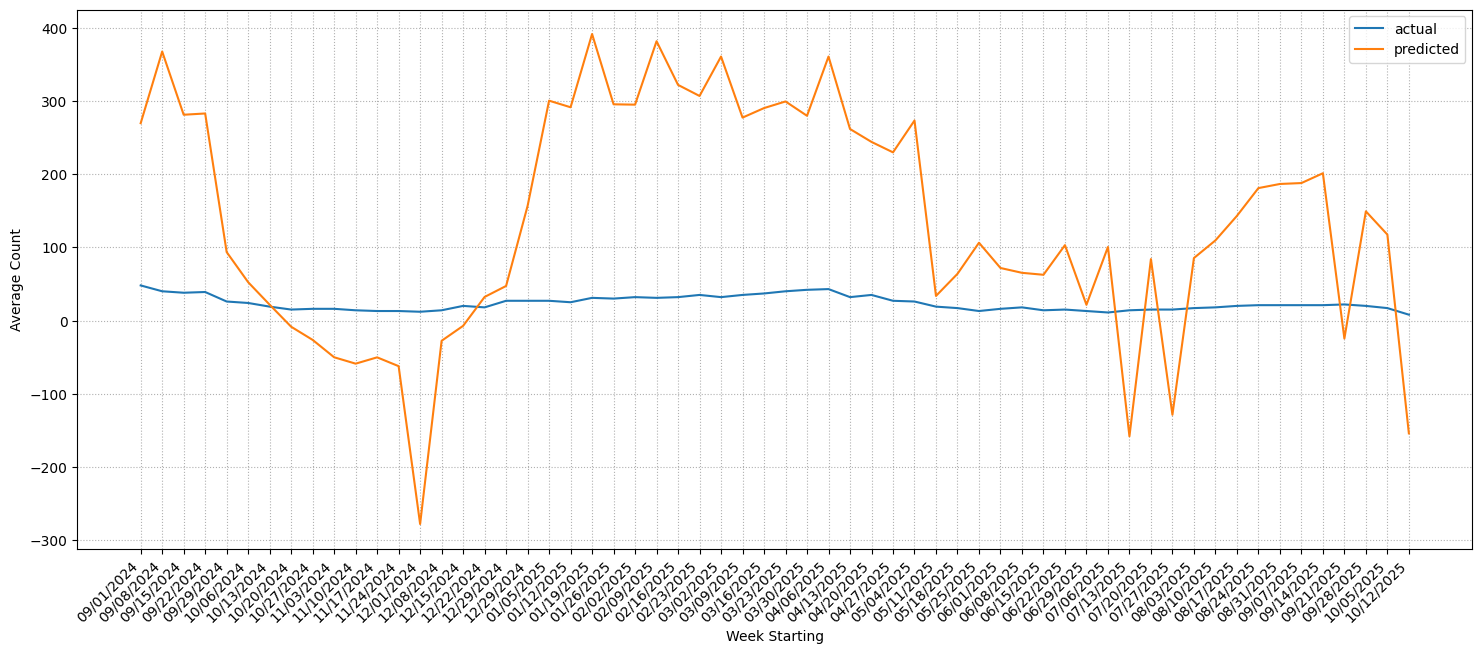

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = br_model.predict(X_train)
models_train.append(gen_model_entry('Bayes Regressor', y_train.to_list(), y_pred))

## Linear Support Vector Regression

In [ ]:
from sklearn.svm import LinearSVR

reg = LinearSVR()
lsvr_model = reg.fit(X_train, y_train)

y_pred = lsvr_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

72.67029836567819


In [ ]:
models_test.append(gen_model_entry('LinearSVR Regressor', y_test, y_pred))

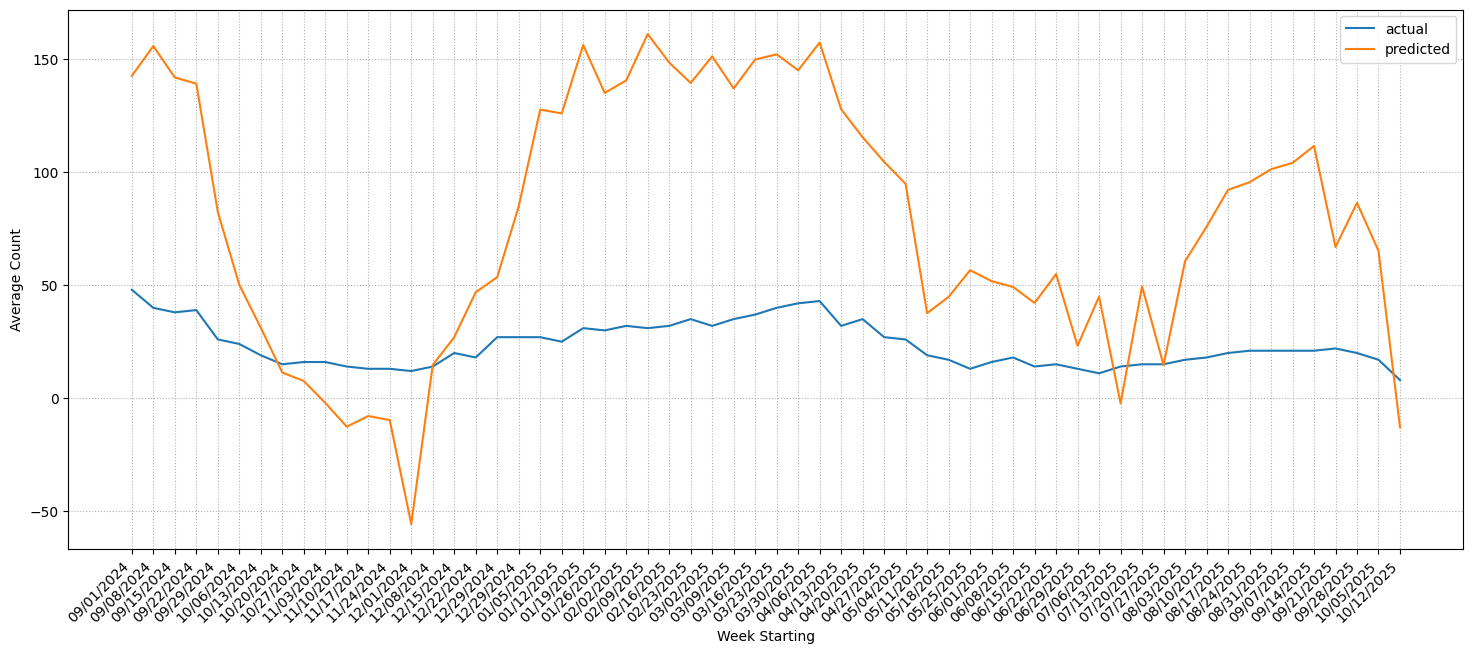

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = lsvr_model.predict(X_train)
models_train.append(gen_model_entry('LinearSVR Regressor', y_train.to_list(), y_pred))

## SVR Regression

In [ ]:
from sklearn.svm import SVR

reg = SVR()
svr_model = reg.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

60.63683001788105


In [ ]:
models_test.append(gen_model_entry('SVR Regressor', y_test, y_pred))

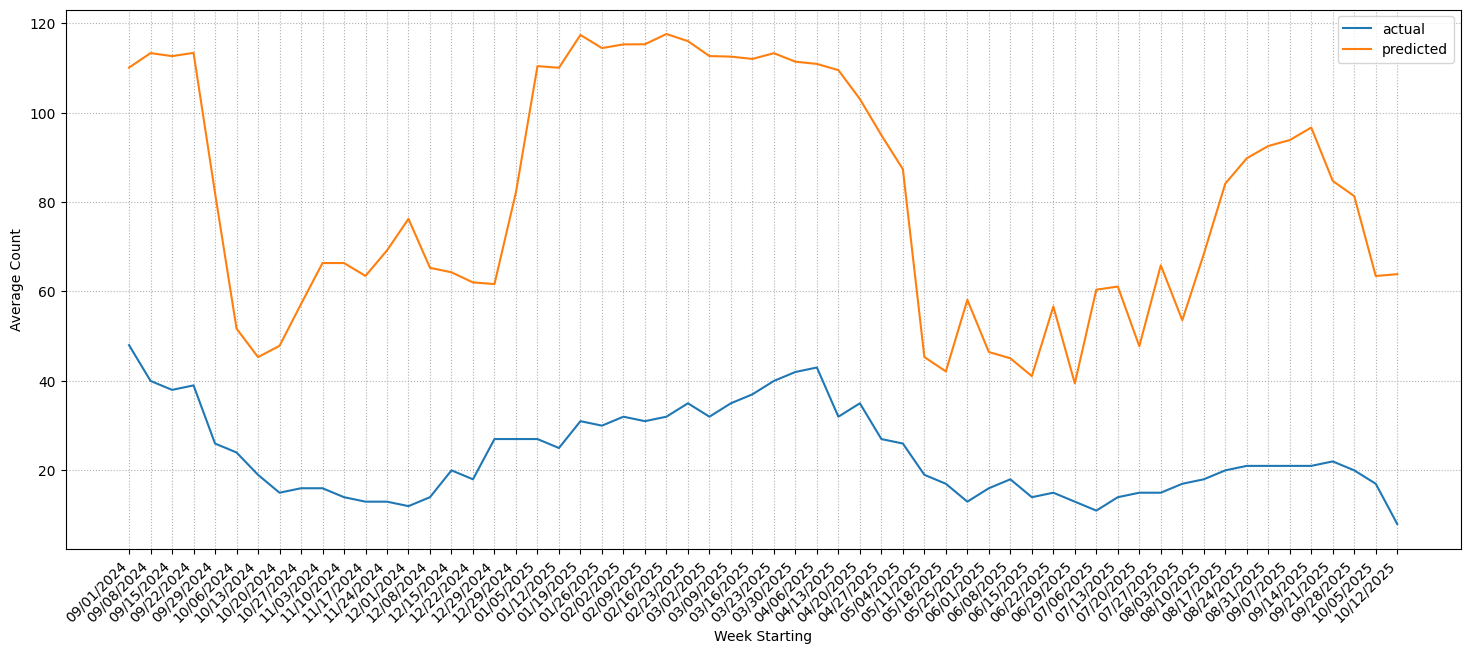

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = svr_model.predict(X_train)
models_train.append(gen_model_entry('SVR Regressor', y_train.to_list(), y_pred))

## SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
sgd_model = reg.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

In [ ]:
report = root_mean_squared_error(y_test, y_pred)
print(report)

183.1337931889805


In [ ]:
models_test.append(gen_model_entry('SGD Regressor', y_test, y_pred))

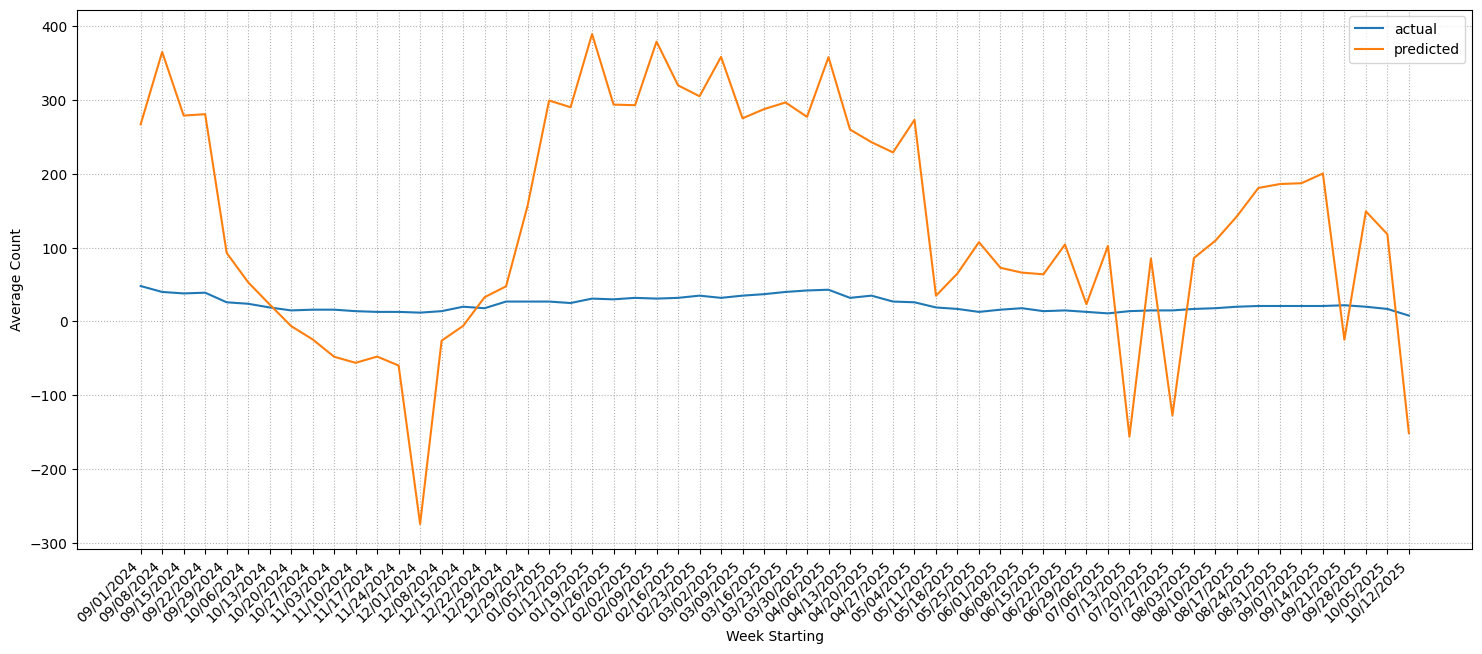

In [ ]:
plot_line(y_test.to_list(), y_pred)

In [ ]:
y_pred = sgd_model.predict(X_train)
models_train.append(gen_model_entry('SGD Regressor', y_train.to_list(), y_pred))

## Tabulate results

In [ ]:
models_train_df = pd.DataFrame(models_train)
models_test_df = pd.DataFrame(models_test)

models_train_df['train_rmse'] = models_train_df['rmse']
models_test_df['test_rmse'] = models_test_df['rmse']

In [ ]:
eval_df = pd.merge(models_train_df.drop(labels=['rmse'], axis=1), models_test_df.drop(labels=['rmse'], axis=1), on="model")

In [ ]:
eval_df['diff'] = eval_df['train_rmse'] - eval_df['test_rmse']

In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       11 non-null     object 
 1   train_rmse  11 non-null     float64
 2   test_rmse   11 non-null     float64
 3   diff        11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 484.0+ bytes


In [ ]:
eval_df.sort_values(by=['test_rmse'], axis=0, ascending=True)

,model,train_rmse,test_rmse,diff
9,SVR Regressor,205.345044,60.636830,144.708214
8,LinearSVR Regressor,181.998713,72.670298,109.328414
1,Logistic Regressor,78.809871,82.723133,-3.913261
0,Dummy Regressor,208.599572,111.966760,96.632811
5,Gradient Boost Regressor,8.605614,151.452624,-142.847010
6,XGBoost Regressor,0.350055,158.767493,-158.417437
3,Tree Regressor,0.000000,160.673893,-160.673893
4,Random Forest Regressor,31.781496,178.478732,-146.697236
10,SGD Regressor,137.645134,183.133793,-45.488659
7,Bayes Regressor,137.616982,184.709012,-47.092029


It appears that when comparing all models, the SVRegressor was the best at predicting the number of hospitalization cases on new data as the test data had the lowest root mean square error.  Further, it was less than the Dummy regressor whch was used to establish the baseline. All other models scored a higher test rmse value. 

I also wanted to point out that the diff between the train and test root mean square error was positive for the SVRegressor, and Dummy regressor. This indicates there was no overfitting by these three models. The root mean square error calculation was lessser for the test rmse than it was for the training rmse.  All other models demonstrated higher training root mean square errors on the training data than the test data, indicating significant overfitting.

However, there is more that can be done to analayse and improve its performance. I will use a SHAP analaysis to identify the best predictors and I will also improve the model performance by tuning its hyperparameters through grid search.